In [1]:
# 1. Load libraries & data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# **1.Data Preprocessing**

*1*. Load the Dataset

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [3]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [4]:
#Add Column Names
# Add the species column (for reference only, not for clustering)
df['species'] = iris.target

# Rename columns for better readability
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


2. Check for Missing Values

In [5]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


3. Feature Scaling (StandardScaler)

In [6]:
from sklearn.preprocessing import StandardScaler

# Drop species column for clustering
features = df.drop('species', axis=1)

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_df.head()


,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


# **2. EDA (Exploratory Data Analysis)**

In [7]:
# Basic statistics
df.describe()


,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


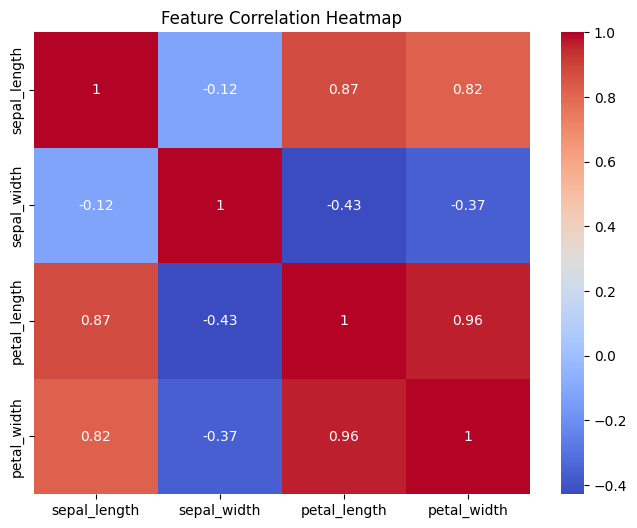

In [8]:
# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.drop('species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()



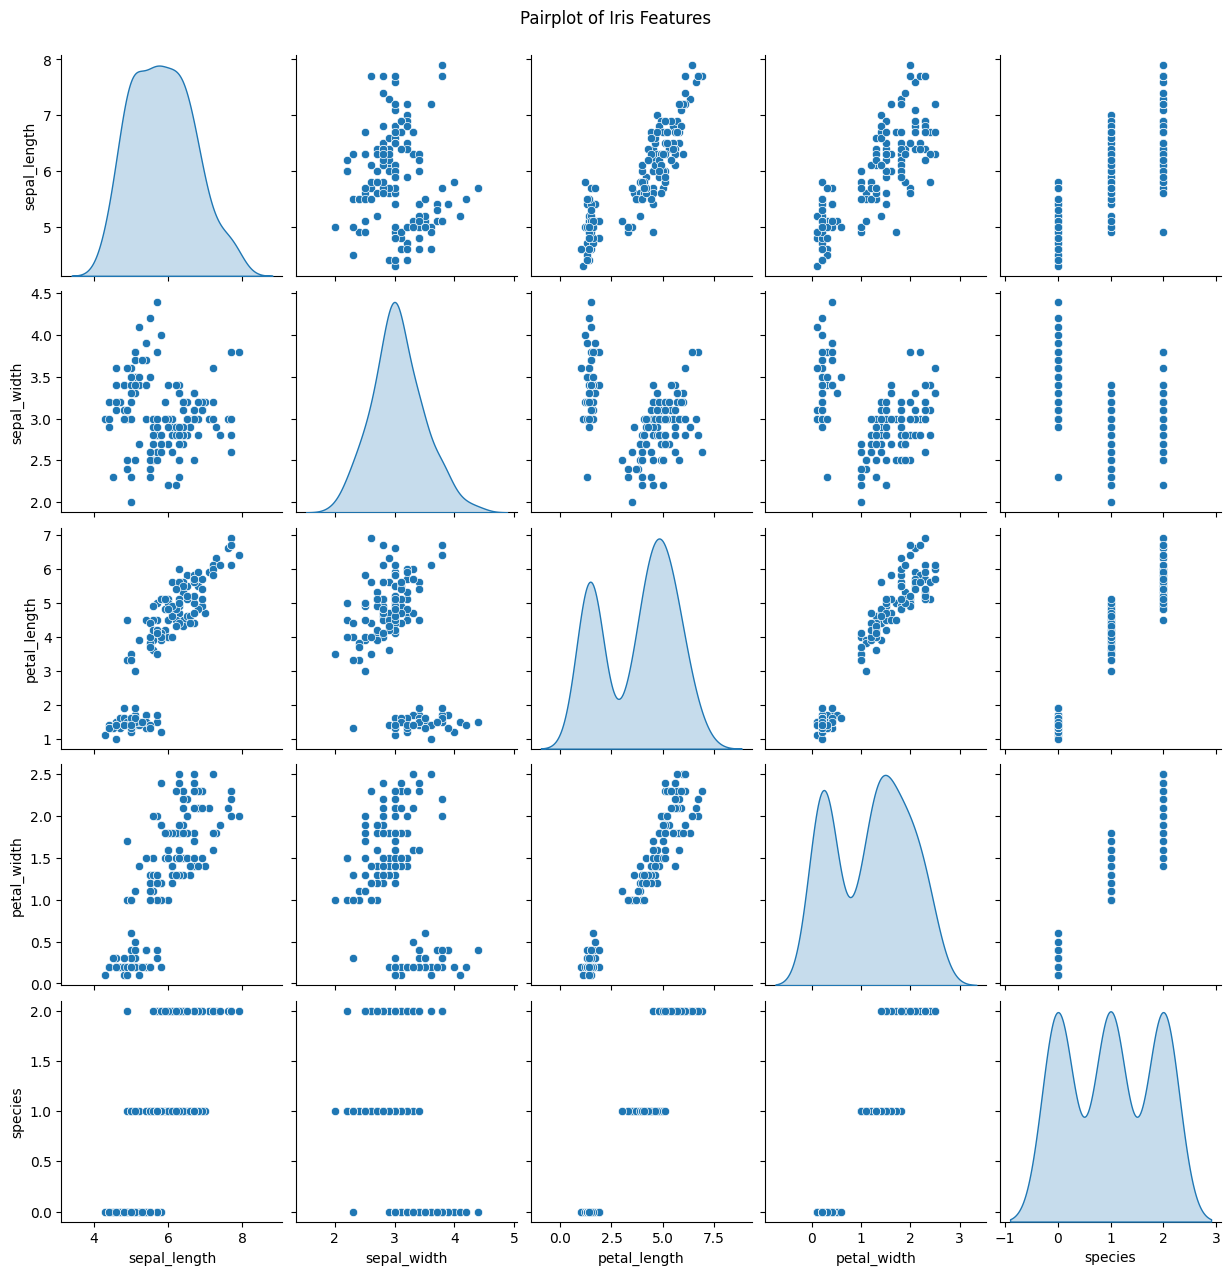

In [9]:
# Pairplot of features (without species hue)
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Pairplot of Iris Features', y=1.02)
plt.show()


# **3. Apply Clustering Algorithms**

 K-Means

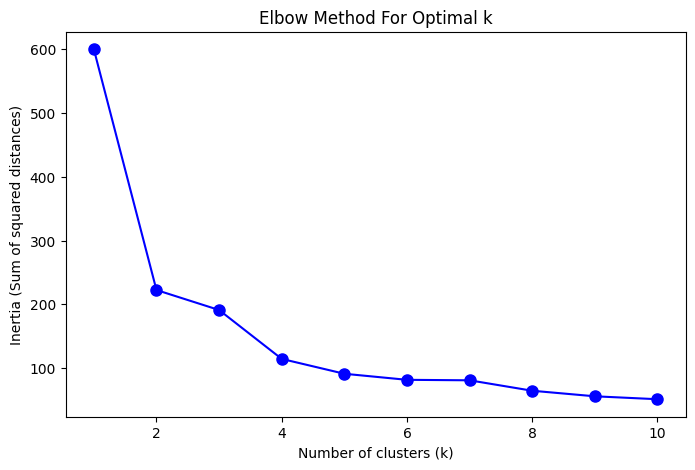

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

X = scaled_df.values

# Step 1: Use Elbow Method to find the optimal k
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.title('Elbow Method For Optimal k')
plt.show()

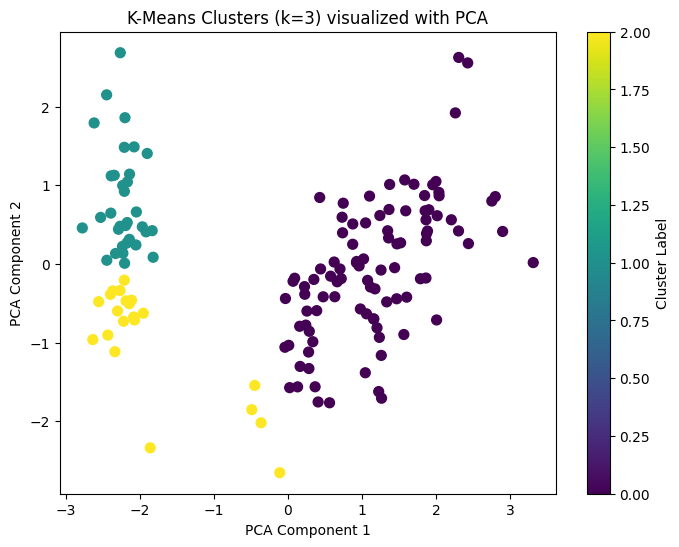

In [11]:
# Step 2: Choose optimal k based on Elbow plot (say k=3 for Iris)

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Step 3: Visualize clusters using PCA (reduce to 2D for plotting)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'K-Means Clusters (k={optimal_k}) visualized with PCA')
plt.colorbar(scatter, label='Cluster Label')
plt.show()

**Hierarchical Clustering**

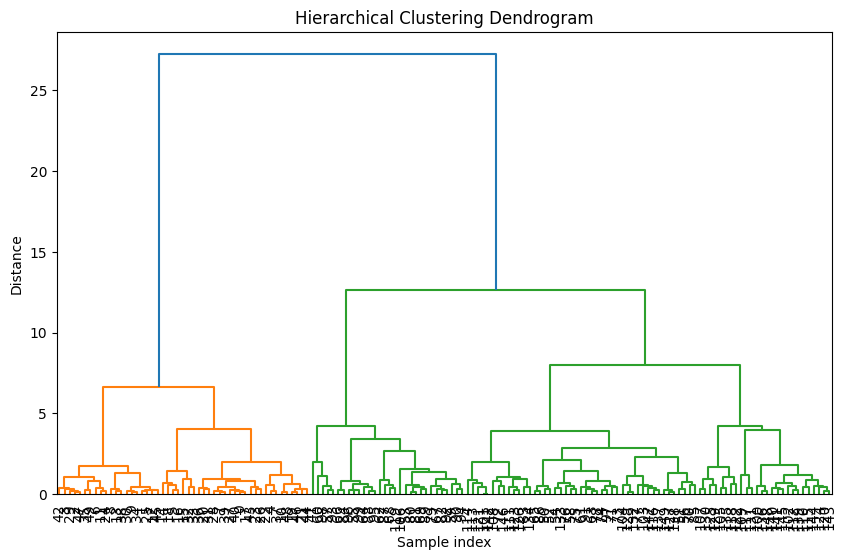

In [12]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.decomposition import PCA

X = scaled_df.values

# Step 1: Compute linkage matrix using Ward's method (minimizes variance)
Z = linkage(X, method='ward')

# Step 2: Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

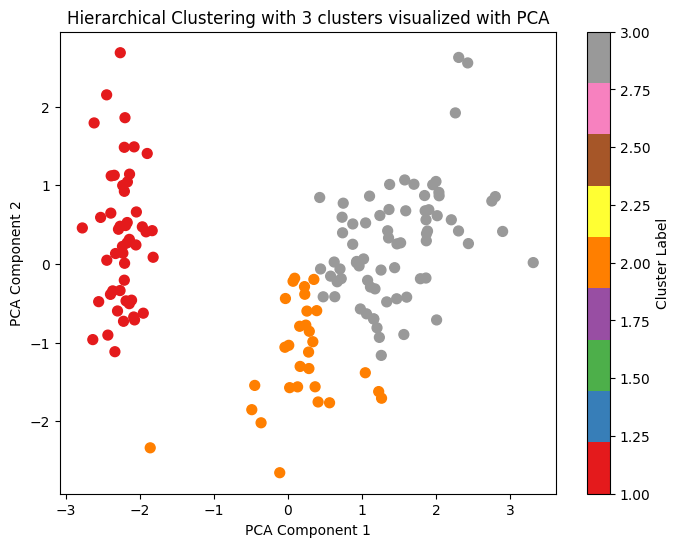

In [13]:
# Step 3: Choose number of clusters 3
num_clusters = 3

# Cut the dendrogram to form flat clusters
cluster_labels = fcluster(Z, t=num_clusters, criterion='maxclust')

# Step 4: Visualize clusters using PCA (reduce to 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='Set1', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'Hierarchical Clustering with {num_clusters} clusters visualized with PCA')
plt.colorbar(scatter, label='Cluster Label')
plt.show()

# **DBSCAN**

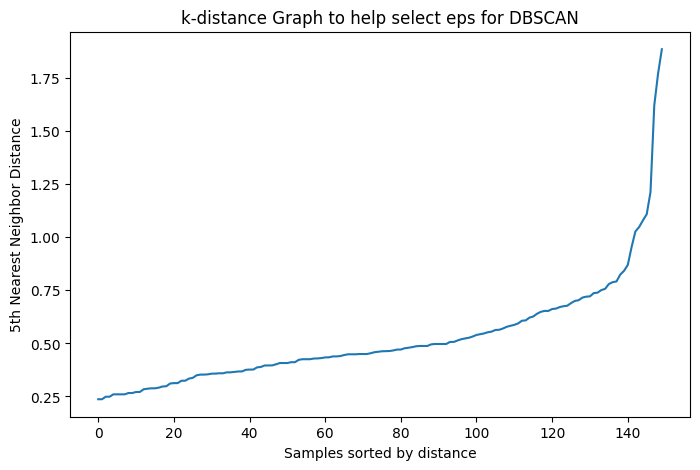

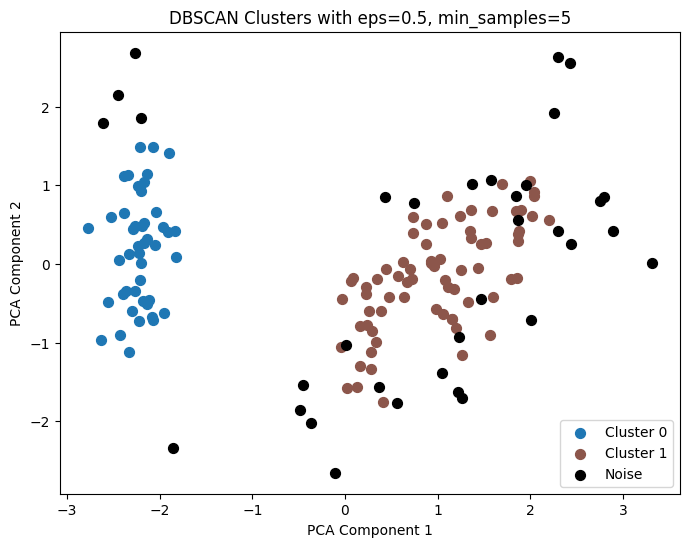

In [14]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

X = scaled_df.values

# Step 1: Compute the distances to the k-th nearest neighbor (k = min_samples)
min_samples = 5
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# k-distance is distance to the k-th nearest neighbor (here min_samples-th)
k_distances = np.sort(distances[:, -1])

# Plot k-distance graph to find the "elbow" (optimal eps)
plt.figure(figsize=(8,5))
plt.plot(k_distances)
plt.xlabel('Samples sorted by distance')
plt.ylabel(f'{min_samples}th Nearest Neighbor Distance')
plt.title('k-distance Graph to help select eps for DBSCAN')
plt.show()

# Step 2: Choose eps based on the k-distance graph (example: eps=0.5)
eps = 0.5

# Step 3: Apply DBSCAN clustering
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(X)

# Step 4: Visualize clusters & noise points using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))

# Noise points are labeled -1, plot them in black
unique_labels = set(dbscan_labels)
colors = [plt.cm.tab10(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    class_member_mask = (dbscan_labels == k)
    if k == -1:
        # Noise points
        col = [0, 0, 0, 1]  # Black color
        label = 'Noise'
    else:
        label = f'Cluster {k}'

    plt.scatter(X_pca[class_member_mask, 0], X_pca[class_member_mask, 1], c=[col], label=label, s=50)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'DBSCAN Clusters with eps={eps}, min_samples={min_samples}')
plt.legend()
plt.show()


# **4. Evaluation (Optional but encouraged)**

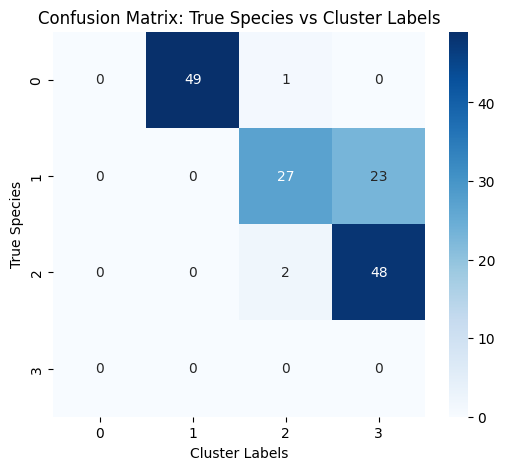

In [15]:
from sklearn.metrics import confusion_matrix, adjusted_rand_score

# True labels from original dataframe (assuming species is categorical or numeric)
true_labels = df['species']

# cluster_labels should be the output from your clustering method
# For example, from KMeans:
# cluster_labels = kmeans.fit_predict(scaled_df.values)

# 1. Confusion Matrix
cm = confusion_matrix(true_labels, cluster_labels)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Cluster Labels')
plt.ylabel('True Species')
plt.title('Confusion Matrix: True Species vs Cluster Labels')
plt.show()



In [16]:
# 2. Adjusted Rand Index (ARI)
ari = adjusted_rand_score(true_labels, cluster_labels)
print(f'Adjusted Rand Index (ARI): {ari:.4f}')


Adjusted Rand Index (ARI): 0.6153
